<a href="https://colab.research.google.com/github/Jiaweihu08/Kaggle-Competitions/blob/master/Kannada_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kannada MNIST Digit Recognition

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Importing libraries:

In [0]:
import pandas as pd
import tensorflow as tf
import numpy as np
import os

Loading data:

In [0]:
train_path = './drive/My Drive/Kannada-MNIST/train.csv'
test_path = './drive/My Drive/Kannada-MNIST/test.csv'

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

#df_train.head()

In [0]:
X_train = df_train.drop(columns='label')
Y_train = df_train['label']

X_test = df_test.drop(columns='id')

print('Training set size: ', X_train.shape)
print('Testing set size: ', X_test.shape)
print('Number of classes:', len(set(Y_train)))

Training set size:  (60000, 784)
Testing set size:  (5000, 784)
Number of classes: 10


In [0]:
Y_train.value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

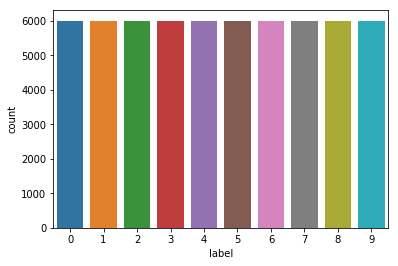

In [0]:
import seaborn as sns

sns.countplot(Y_train)

Check missing values:

In [0]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [0]:
X_test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

Split training data into training and validation sets:

In [0]:
from sklearn.model_selection import train_test_split

# Turn our data into numpy arrays.
X_train, Y_train = X_train.values, Y_train.values

# Splitting the data into training and validation sets.
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.05, random_state=0)

print('Training set size: ', x_train.shape[0])
print('Validation set size: ', x_val.shape[0])

Training set size:  57000
Validation set size:  3000


Data Normalization and reshaping:

In [0]:
x_train = x_train/255.
x_val = x_val/255.

x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

print(x_train.shape)
print(x_val.shape)

(57000, 28, 28, 1)
(3000, 28, 28, 1)


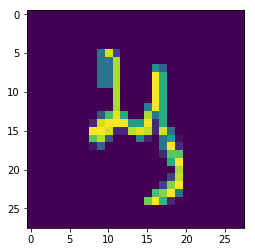

In [0]:
import matplotlib.pyplot as plt
#%matplotlib inline

plt.imshow(x_train[4][:,:,0])
plt.show()

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

epochs = 30
batch_size = 86

hist = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), verbose=2)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 57000 samples, validate on 3000 samples
Epoch 1/30
57000/57000 - 7s - loss: 0.1268 - acc: 0.9640 - val_loss: 0.0432 - val_acc: 0.9850
Epoch 2/30
57000/57000 - 4s - loss: 0.0344 - acc: 0.9895 - val_loss: 0.0346 - val_acc: 0.9893
Epoch 3/30
57000/57000 - 4s - loss: 0.0228 - acc: 0.9932 - val_loss: 0.0305 - val_acc: 0.9903
Epoch 4/30
57000/57000 - 4s - loss: 0.0181 - acc: 0.9942 - val_loss: 0.0247 - val_acc: 0.9927
Epoch 5/30
57000/57000 - 4s - loss: 0.0130 - acc: 0.9958 - val_loss: 0.0281 - val_acc: 0.9930
Epoch 6/30
57000/57000 - 4s - loss: 0.0116 - acc: 0.9964 - val_loss: 0.0259 - val_acc: 0.9913
Epoch 7/30
57000/57000 - 4s - loss: 0.0090 - acc: 0.9972 - val_loss: 0.0303 - val_acc: 0.9927
Epoch 8/30
57000/57000 - 4s - loss: 0.0069 - acc: 0.9976 - val_loss: 0.0183 - val_acc: 0.9953
Epoch 9/30
57000/57000 - 4s - loss: 0.0058 - acc: 0.9982 - val_loss: 0.0395 - val_acc: 0.9907
Epoch 10/30
57000/57000 

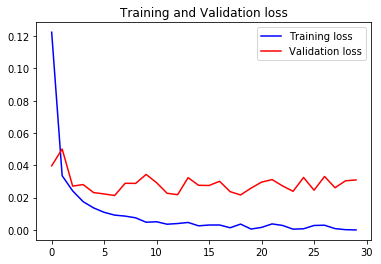

In [0]:
train_acc = hist.history['acc']
val_acc = hist.history['val_acc']

train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(train_acc))

#plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
#plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
#plt.title('Training and Validation Accuracy')
#plt.legend()

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

Let's see if combining learning rate annealer and image augmentation can improve the results:

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

datagen.fit(x_train)

Using TensorFlow backend.


In [0]:
lr_reduce = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_acc',
    factor=0.5,
    patience=3,
    min_lr=0.00001,
    verbose=1
)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit_generator(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=30,
    verbose=2,
    validation_data=(x_val, y_val),
    callbacks=[lr_reduce]
)

Epoch 1/30
Epoch 1/30
3000/663 - 0s - loss: 0.0705 - acc: 0.9963
663/663 - 18s - loss: 0.0268 - acc: 0.9915 - val_loss: 0.0170 - val_acc: 0.9963
Epoch 2/30
Epoch 1/30
3000/663 - 0s - loss: 0.0631 - acc: 0.9960
663/663 - 17s - loss: 0.0267 - acc: 0.9912 - val_loss: 0.0161 - val_acc: 0.9960
Epoch 3/30
Epoch 1/30
3000/663 - 0s - loss: 0.0168 - acc: 0.9960
663/663 - 17s - loss: 0.0248 - acc: 0.9923 - val_loss: 0.0136 - val_acc: 0.9960
Epoch 4/30
Epoch 1/30
3000/663 - 0s - loss: 0.0286 - acc: 0.9960

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
663/663 - 17s - loss: 0.0238 - acc: 0.9927 - val_loss: 0.0129 - val_acc: 0.9960
Epoch 5/30
Epoch 1/30
3000/663 - 0s - loss: 0.0336 - acc: 0.9963
663/663 - 17s - loss: 0.0177 - acc: 0.9943 - val_loss: 0.0124 - val_acc: 0.9963
Epoch 6/30
Epoch 1/30
3000/663 - 0s - loss: 0.0211 - acc: 0.9960
663/663 - 17s - loss: 0.0168 - acc: 0.9945 - val_loss: 0.0126 - val_acc: 0.9960
Epoch 7/30
Epoch 1/30
3000/663 - 0s - loss: 0.031

<Figure size 432x288 with 0 Axes>

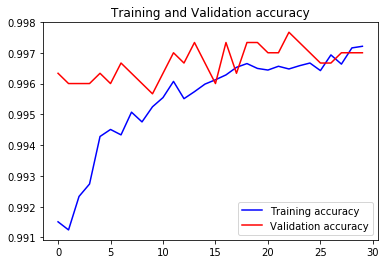

<Figure size 432x288 with 0 Axes>

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

In [0]:
X_test = X_test.values
X_test = X_test/255.
x_test = X_test.reshape(-1, 28, 28, 1)

results = model.predict_classes(x_test, batch_size=batch_size)
results = pd.Series(results, name='label')

AttributeError: ignored

In [0]:
submission = pd.concat([df_test['id'], results], axis=1)
submission.set_index('id', inplace=True)

submission.to_csv('Kannada-MNIST_submission.csv', index=False)

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes, title, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    plt.xticks(np.arange(10), classes, rotation=45)
    plt.yticks(np.arange(10), classes)
    plt.title(title)
    plt.colorbar()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    
    for i, j in itertools.product(range(10), range(10)):
        plt.text(j, i, cm[i, j],
                ha='center',
                color='white' if cm[i, j] > cm.max()/2 else 'black')
    
    plt.tight_layout()

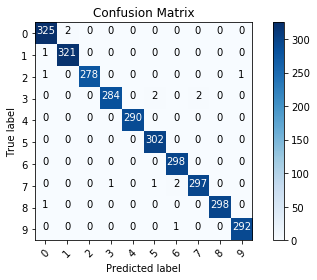

In [0]:
pred = model.predict_classes(x_val)

plot_confusion_matrix(y_val, pred, classes=range(10), title='Confusion Matrix')

In [0]:
def plot_top_errors(error_indix, img_errors, y_true_errors, y_pred_errors):
    n_row = 2
    n_col = 3
    n = 0
    
    fig, ax = plt.subplots(n_row, n_col, sharex=True, sharey=True)
    for row, col in itertools.product(range(n_row), range(n_col)):
        error = error_indix[n]
        ax[row, col].imshow(img_errors[error])
        ax[row, col].set_title("Predicted label: {}\nTrue label: {}".format(y_true_errors[n], y_pred_errors[n]))
        n+=1
    fig.tight_layout()

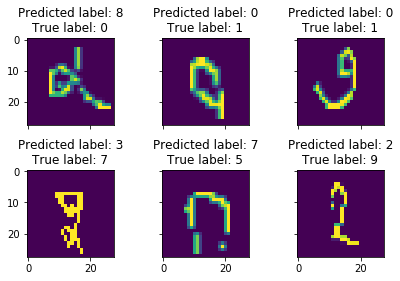

In [0]:
errors = (y_val - pred != 0)

y_pred_proba = model.predict_proba(x_val)
y_pred_proba = np.max(y_pred_proba, axis=1)
y_pred_class = model.predict_classes(x_val)

y_val_errors = y_val[errors]
y_pred_proba_errors = y_pred_proba[errors]
y_pred_class_errors = y_pred_class[errors]
x_val_errors = x_val[errors].reshape(-1, 28, 28)

top_errors = np.argsort(y_pred_proba_errors)


plot_top_errors(top_errors, x_val_errors, y_val_errors, y_pred_class_errors)